In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('master_tickets.csv')
df.head()

,fiscal_year,acct_id,is_college_pass,event_name,event_date,add_datetime,days_before_event,section_name,row_name,seat_num,...,marital_status,education,zip,Weekend,Series,Name,Type,month,month_name,season_period
0,FY23,8362049,False,230922SE,2022-09-22,2022-07-15,69.0,BALCL,A,4,...,Single,NaN,30041,CS1,1,Opening Weekend,Classical,7.0,July,Off-Season
1,FY23,8449640,False,230922SE,2022-09-22,2022-09-14,8.0,BALCL,B,1,...,Married,Graduate School,30316,CS1,1,Opening Weekend,Classical,9.0,September,Opening
2,FY23,4061365,False,230922SE,2022-09-22,2022-07-27,57.0,BALCL,B,4,...,Single,College,30308,CS1,1,Opening Weekend,Classical,7.0,July,Off-Season
3,FY23,354115,False,230922SE,2022-09-22,2022-04-05,170.0,BALCL,C,1,...,Married,College,30087,CS1,1,Opening Weekend,Classical,4.0,April,Peak
4,FY23,8908470,False,230922SE,2022-09-22,2022-09-20,2.0,BALCL,C,3,...,Inferred Single,High School,30253,CS1,1,Opening Weekend,Classical,9.0,September,Opening


In [3]:
# for first year subscribers in FY23
df23 = df[df['fiscal_year'] =='FY23']
filtered1 = df23[df23['price_code_type'].str.startswith('Fixed Freshman Subscription', na=False)]
freshman23 = np.sum(filtered1.groupby('price_code_type')['ticket_type'].count())
print('Freshman Subscribers in FY23: ' + str(freshman23))

# for second year subscribers in FY24 - to compare with first year subscribers in FY23
df24 = df[df['fiscal_year'] =='FY24']
filtered2 = df24[df24['price_code_type'].str.startswith('Fixed Sophomore Subscription', na=False)]
sophomore24 = np.sum(filtered2.groupby('price_code_type')['ticket_type'].count())
print('Sophomore Subscribers in FY24: ' + str(sophomore24))

print('Rate of coming back from Freshman in FY23 to Sophomore in FY24: ' + str(sophomore24 / freshman23 * 100))

Freshman Subscribers in FY23: 2300
Sophomore Subscribers in FY24: 1024
Rate of coming back from Freshman in FY23 to Sophomore in FY24: 44.52173913043478


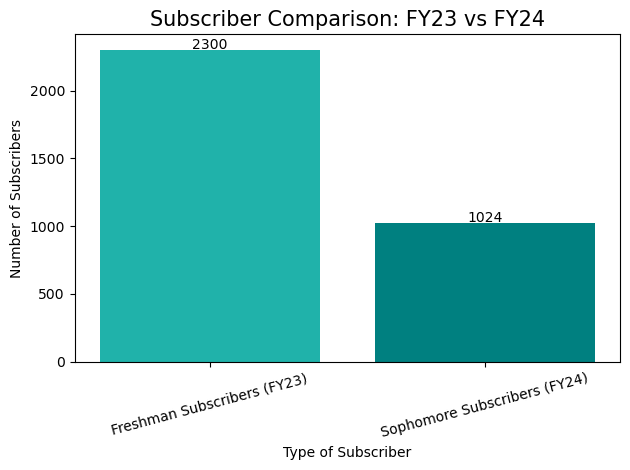

In [4]:
# Data
labels = ['Freshman Subscribers (FY23)', 'Sophomore Subscribers (FY24)']
values = [freshman23, sophomore24]

# Plot
plt.bar(labels, values, color=['lightseagreen', 'teal'])
plt.title('Subscriber Comparison: FY23 vs FY24', fontsize = 15)
plt.xlabel('Type of Subscriber')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=15)

# Add value labels on top of bars
for i, value in enumerate(values):
    plt.text(i, value + 50, str(value), ha='center', va='center_baseline', fontsize=10)

plt.tight_layout()
plt.show()

In [5]:
# for 2 year subscribers in FY23
df23 = df[df['fiscal_year'] =='FY23']
filtered3 = df23[df23['price_code_type'].str.startswith('Fixed Sophomore Subscription', na=False)]
sophomore23 = np.sum(filtered3.groupby('price_code_type')['ticket_type'].count())
sophomore23

1015

In [6]:
filtered3['acct_id']

1        8449640
13       4721140
14       7603871
16        100532
17        100532
          ...   
28525    7648541
28545     120156
28546    7097717
28588    7595688
28590    7011083
Name: acct_id, Length: 1015, dtype: int64

In [7]:
# for three+ year subscribers in FY24 - to compare with second year subscribers in FY23
# I'm not sure if you can compare with just second year subscribers, since it's 3+ years but
df24 = df[df['fiscal_year'] =='FY24']
filtered4 = df24[df24['price_code_type'].str.startswith('Fixed Established Subscription', na=False)]
established24 = np.sum(filtered4.groupby('price_code_type')['ticket_type'].count())
established24 #8410 established subscribers in FY24

count_match = filtered4['acct_id'].isin(filtered3['acct_id']).sum()
print(count_match)

644


In [24]:
# All of the sophomore subscribers in 2023 who are now established subscribers in 2024
estabfromsoph24 = filtered4[filtered4['acct_id'].isin(filtered3['acct_id'])]
estabfromsoph24

,fiscal_year,acct_id,is_college_pass,event_name,event_date,add_datetime,days_before_event,section_name,row_name,seat_num,...,marital_status,education,zip,Weekend,Series,Name,Type,month,month_name,season_period
32472,FY24,157798,False,241005SE,2023-10-05,2023-03-21,198.0,ORCHL,S,15,...,Married,Graduate School,30305,CS1,1,Opening Weekend,Classical,3.0,March,Peak
32473,FY24,157798,False,241005SE,2023-10-05,2023-03-21,198.0,ORCHL,S,17,...,Married,Graduate School,30305,CS1,1,Opening Weekend,Classical,3.0,March,Peak
32480,FY24,135402,False,241007SE,2023-10-07,2023-03-27,194.0,LOGEL,B,4,...,Married,Graduate School,30340,CS1,1,Opening Weekend,Classical,3.0,March,Peak
32542,FY24,390349,False,241021SE,2023-10-21,2023-09-12,39.0,ORCHL,V,19,...,Single,Graduate School,30329,CS2,3,Prokofiev Romeo & Juilet,Classical,9.0,September,Opening
32551,FY24,2621185,False,241102SE,2023-11-02,2023-05-02,184.0,ORCHR,F,18,...,Married,Graduate School,30309,CS3,2,Stutzmann + Brahms Songs,Classical,5.0,May,Peak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51643,FY24,178566,False,240613SE,2024-06-13,2023-04-21,419.0,DRESSL,K,20,...,Married,College,30092,CS24,4,Beethoven Violin Concerto,Classical,4.0,April,Peak
51667,FY24,238626,False,240613SE,2024-06-13,2023-03-29,442.0,ORCHL,R,1,...,Married,High School,30319-1322,CS24,4,Beethoven Violin Concerto,Classical,3.0,March,Peak
51685,FY24,7603319,False,240613SE,2024-06-13,2023-07-27,322.0,ORCHR,N,13,...,Married,College,10471,CS24,4,Beethoven Violin Concerto,Classical,7.0,July,Off-Season
51725,FY24,7675625,False,240615SE,2024-06-15,2023-06-06,375.0,DRESSL,K,1,...,Married,High School,30342,CS24,4,Beethoven Violin Concerto,Classical,6.0,June,Finale


In [25]:
estabfromsoph24['age'].describe()

count    619.000000
mean      63.672052
std       15.207541
min       24.000000
25%       54.000000
50%       64.000000
75%       76.000000
max       99.000000
Name: age, dtype: float64

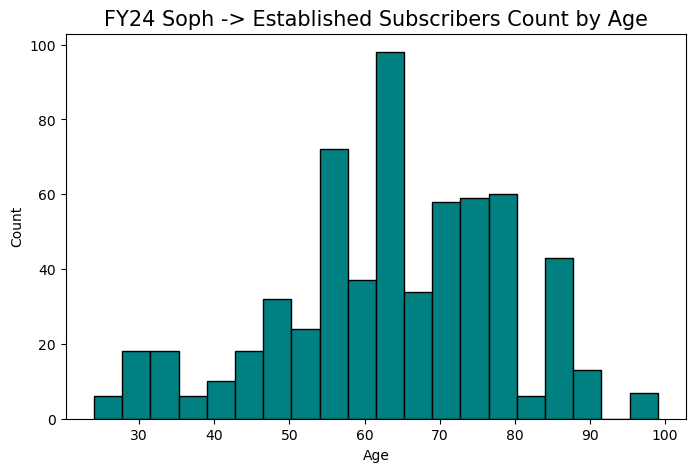

In [30]:
plt.figure(figsize=(8,5))
plt.hist(estabfromsoph24['age'].dropna(), bins=20, color = 'teal', edgecolor='black')
plt.title('FY24 Soph -> Established Subscribers Count by Age', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

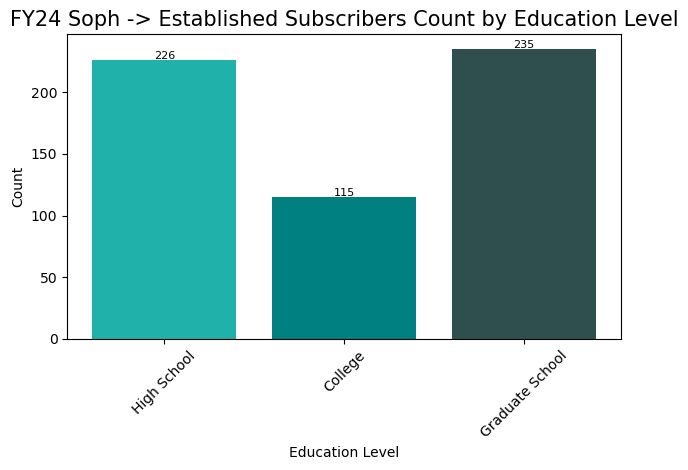

In [41]:
edu_counts = estabfromsoph24.groupby('education')['ticket_type'].count()

order = ['High School', 'College', 'Graduate School']
edu_counts = edu_counts.reindex(order)

plt.bar(edu_counts.index, edu_counts.values, color=['lightseagreen', 'teal', 'darkslategray'])
plt.title('FY24 Soph -> Established Subscribers Count by Education Level', fontsize = 15)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, value in enumerate(edu_counts.values):
    plt.text(i, value + 1, str(value), ha='center', va='baseline', fontsize=8)

plt.tight_layout()
plt.show()

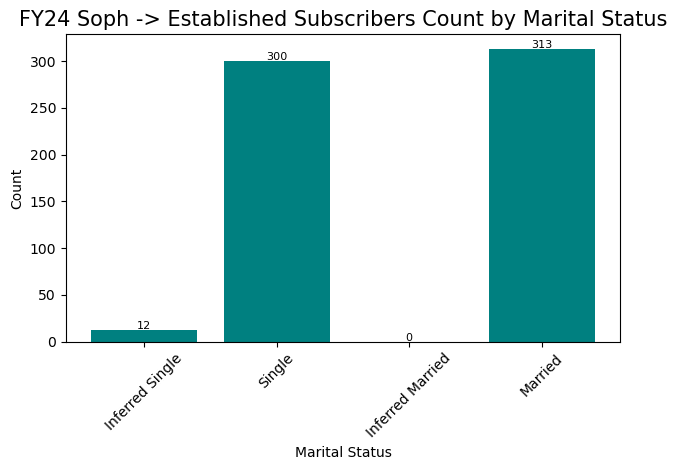

In [47]:
marital_counts = estabfromsoph24.groupby('marital_status')['ticket_type'].count()

order = ['Inferred Single', 'Single', 'Inferred Married', 'Married']
marital_counts = marital_counts.reindex(order, fill_value = 0)

plt.bar(marital_counts.index, marital_counts.values, color='teal')
plt.title('FY24 Soph -> Established Subscribers Count by Marital Status', fontsize = 15)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, value in enumerate(marital_counts.values):
    plt.text(i, value + 1, str(value), ha='center', va='baseline', fontsize=8)
plt.tight_layout()
plt.show()

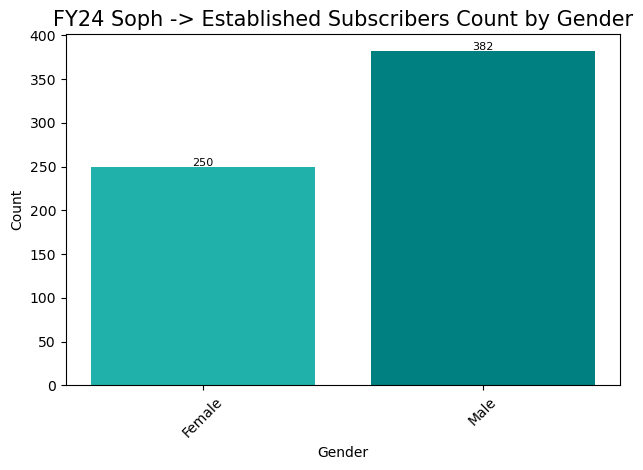

In [49]:
gender_counts = estabfromsoph24.groupby('gender')['ticket_type'].count()

plt.bar(gender_counts.index, gender_counts.values, color=['lightseagreen', 'teal'])
plt.title('FY24 Soph -> Established Subscribers Count by Gender', fontsize = 15)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, value in enumerate(gender_counts.values):
    plt.text(i, value + 1, str(value), ha='center', va='baseline', fontsize=8)
plt.tight_layout()
plt.show()

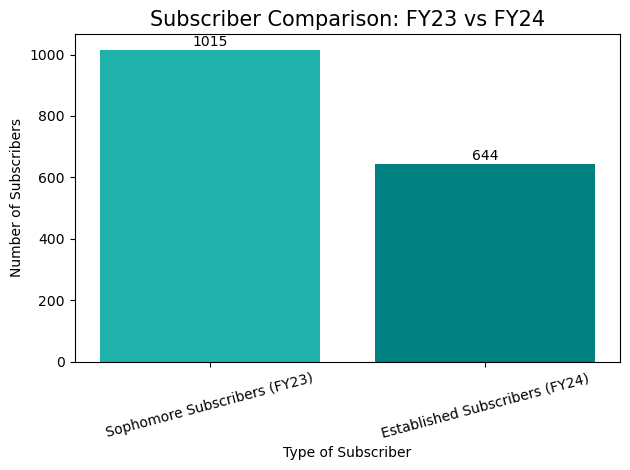

In [8]:
# Data
labels = ['Sophomore Subscribers (FY23)', 'Established Subscribers (FY24)']
values = [sophomore23, count_match]

# Plot
plt.bar(labels, values, color=['lightseagreen', 'teal'])
plt.title('Subscriber Comparison: FY23 vs FY24', fontsize = 15)
plt.xlabel('Type of Subscriber')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=15)

# Add value labels on top of bars
for i, value in enumerate(values):
    plt.text(i, value + 50, str(value), ha='center', va='top', fontsize=10)

plt.tight_layout()
plt.show()

In [52]:
# count of CYO subscribers in FY23
df23 = df[df['fiscal_year'] =='FY23']
CYO23 = df23[df23['price_code_type'] == 'CYO Subscription']['ticket_type'].count()
print('CYO Subscribers in FY23: ' + str(CYO23))

# for upgraded subscribers in FY24 - to compare with CYO subscribers in FY23
df24 = df[df['fiscal_year'] =='FY24']
filtered = df24[df24['price_code_type'].str.startswith('Fixed Upgrade Subscription', na=False)]
upgrade24 = np.sum(filtered.groupby('price_code_type')['ticket_type'].count())
print('Upgraded subscriptions in FY24: ' + str(upgrade24))

print('Rate of coming back from CYO in FY23 to Upgraded in FY24: ' + str(upgrade24 / CYO23 * 100))

CYO Subscribers in FY23: 2537
Upgraded subscriptions in FY24: 446
Rate of coming back from CYO in FY23 to Upgraded in FY24: 17.57981868348443


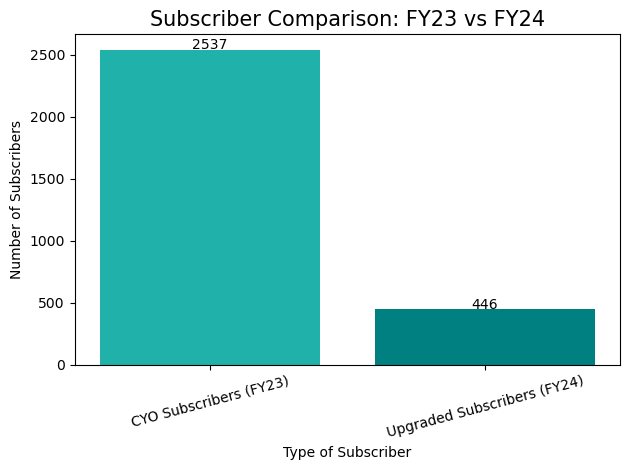

In [10]:
# Data
labels = ['CYO Subscribers (FY23)', 'Upgraded Subscribers (FY24)']
values = [CYO23, upgrade24]

# Plot
plt.bar(labels, values, color=['lightseagreen', 'teal'])
plt.title('Subscriber Comparison: FY23 vs FY24', fontsize = 15)
plt.xlabel('Type of Subscriber')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=15)

# Add value labels on top of bars
for i, value in enumerate(values):
    plt.text(i, value + 50, str(value), ha='center', va='center_baseline', fontsize=10)

plt.tight_layout()
plt.show()

In [128]:
df2 = pd.read_csv('patron_summary.csv')
#display(df2['active_fy23'].value_counts())
patron_2023 = df2[(df2['active_fy23'] == True) & (df2['active_fy24'] == False)]
# ^^ for CYO subscribers only in 2023 and not 2024 
patron_2024 = df2[(df2['active_fy23'] == False) & (df2['active_fy24'] == True)]

In [55]:
CYO23_df = df23[df23['price_code_type'] == 'CYO Subscription']
CYO23_df['acct_id']

0        8362049
2        4061365
5        7214829
10       6297292
18        156577
          ...   
28457    7082865
28477    4257049
28492     170503
28578    4324673
28583    8874502
Name: acct_id, Length: 2537, dtype: int64

In [119]:
# were all of the account ids in the master_tickets found in the patron summary?
CYO23_patron = patron_2023[patron_2023['acct_id'].isin(CYO23_df['acct_id'])]
CYO23_patron
#display(CYO23_patron.columns)

,acct_id,is_college_pass,total_tickets,total_seats,unique_events,total_spent,avg_ticket_price,median_ticket_price,min_ticket_price,max_ticket_price,...,median_days_before_event,min_days_before_event,max_days_before_event,ticket_type_distribution,source_distribution,age_first,gender_first,marital_status_first,education_first,zip_first
130,127526,False,2,3,2,236.0,118.000000,118.0,102.0,134.0,...,1.0,0.0,2.0,"{'Single Ticket': 1, 'Subscription': 1}","{'online': 1, 'ASO Staff': 1}",66.0,Female,Married,College,30329-3515
157,134456,False,6,12,6,1246.0,207.666667,204.0,204.0,226.0,...,239.0,13.0,362.0,{'Subscription': 6},{'online': 6},64.0,Male,Married,College,30022
235,152562,False,5,10,5,1010.0,202.000000,204.0,150.0,226.0,...,176.0,24.0,246.0,"{'Subscription': 4, 'Single Ticket': 1}",{'online': 5},62.0,Female,Married,Graduate School,30306-2632
386,188125,False,10,10,9,240.0,24.000000,22.0,20.0,34.0,...,203.0,86.0,345.0,"{'Subscription': 8, 'Single Ticket': 2}",{'ASO Staff': 10},76.0,Female,Married,Graduate School,30068-3942
423,195209,False,1,2,1,100.0,100.000000,100.0,100.0,100.0,...,21.0,21.0,21.0,{'Subscription': 1},{'online': 1},62.0,Male,Married,Graduate School,303192820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9138425,False,1,1,1,29.0,29.000000,29.0,29.0,29.0,...,3.0,3.0,3.0,{'Subscription': 1},{'online': 1},30.0,Female,Single,High School,29615
15544,9159109,True,5,5,3,68.0,13.600000,14.0,0.0,40.0,...,2.0,1.0,2.0,{'Subscription': 1},{'online': 5},NaN,NaN,NaN,NaN,NaN
15637,9163157,True,5,5,4,34.0,6.800000,0.0,0.0,34.0,...,1.0,0.0,3.0,{'Subscription': 1},{'online': 5},NaN,NaN,NaN,NaN,30054
16136,9198770,True,4,4,2,54.0,13.500000,7.0,0.0,40.0,...,1.0,1.0,1.0,{'Subscription': 1},{'online': 4},20.0,Male,NaN,High School,30075


In [120]:
CYO23_patron['total_spent'].describe()

count      136.000000
mean       717.427721
std       2003.798400
min         22.000000
25%        247.500000
50%        429.250000
75%        685.000000
max      23157.000000
Name: total_spent, dtype: float64

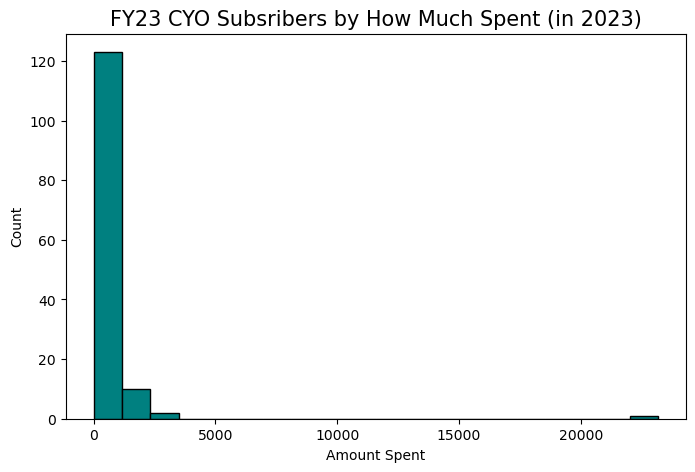

In [125]:
plt.figure(figsize=(8,5))
plt.hist(CYO23_patron['total_spent'].dropna(), bins=20, color = 'teal', edgecolor='black')
plt.title('FY23 CYO Subsribers by How Much Spent (in 2023)', fontsize = 15)
plt.xlabel('Amount Spent')
plt.ylabel('Count')
plt.show()

In [130]:
df24 = df[df['fiscal_year'] =='FY24']
upgrade24_df = df24[df24['price_code_type'].str.startswith('Fixed Upgrade Subscription', na=False)]
upgrade24_df['acct_id']

32484     180326
32523    7071539
32574    2459404
32765     180326
32780    8524938
          ...   
51665     177554
51689    7071539
51732    7599319
51746    7610063
51756    6246542
Name: acct_id, Length: 446, dtype: int64

In [131]:
upgrade24_patron = patron_2024[patron_2024['acct_id'].isin(upgrade24_df['acct_id'])]
upgrade24_patron

,acct_id,is_college_pass,total_tickets,total_seats,unique_events,total_spent,avg_ticket_price,median_ticket_price,min_ticket_price,max_ticket_price,...,median_days_before_event,min_days_before_event,max_days_before_event,ticket_type_distribution,source_distribution,age_first,gender_first,marital_status_first,education_first,zip_first
61,113853,False,6,6,6,252.0,42.000000,42.0,42.0,42.0,...,51.0,2.0,262.0,{'Subscription': 6},{'ASO Staff': 6},86.0,Female,Married,College,30326
5998,7192064,False,6,12,6,266.0,44.333333,33.0,33.0,67.0,...,233.5,84.0,301.0,{'Subscription': 6},"{'onlin': 5, 'ASO Staff': 1}",50.0,Male,Married,Graduate School,303602016


## Relationship between discount rate and demand (how successfully discount rate is working on inducing demand, which group?)

In [11]:
# Main characteristics of the people who just became Established in 2024, (age, educ, average number of attendance) 
df_establish = df24[df24['price_code_type'].str.startswith('Fixed Established Subscription', na=False)]
df_establish['age'].describe()

count    8135.000000
mean       67.209588
std        15.940083
min        20.000000
25%        56.000000
50%        70.000000
75%        78.000000
max        99.000000
Name: age, dtype: float64

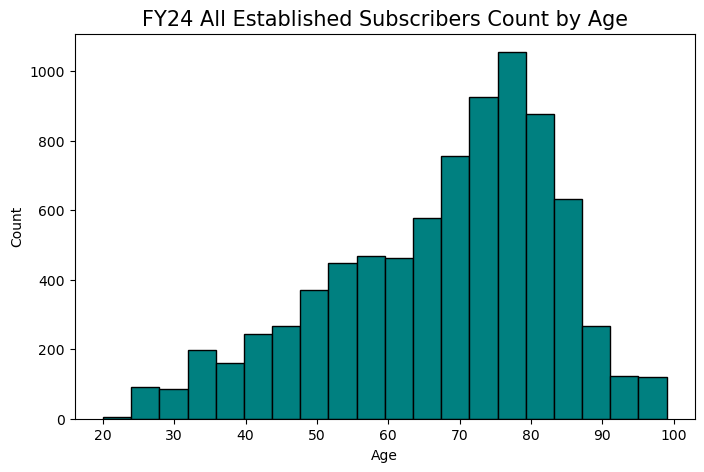

In [32]:
plt.figure(figsize=(8,5))
plt.hist(df_establish['age'].dropna(), bins=20, color = 'teal', edgecolor='black')
plt.title('FY24 All Established Subscribers Count by Age', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [13]:
import matplotlib.pyplot as plt

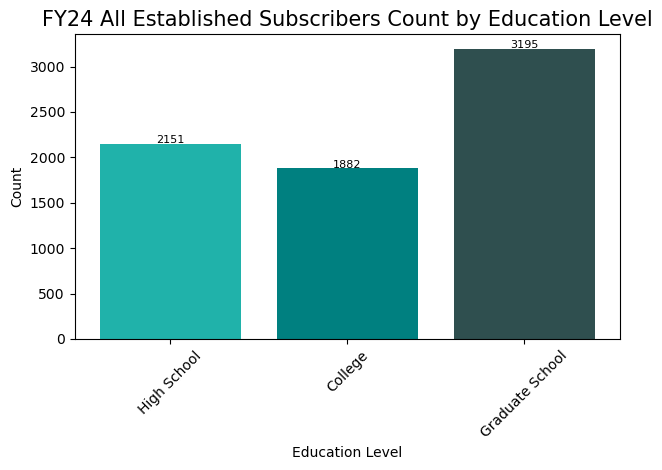

In [33]:
edu_counts = df_establish.groupby('education')['ticket_type'].count()

order = ['High School', 'College', 'Graduate School']
edu_counts = edu_counts.reindex(order)

plt.bar(edu_counts.index, edu_counts.values, color=['lightseagreen', 'teal', 'darkslategray'])
plt.title('FY24 All Established Subscribers Count by Education Level', fontsize = 15)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, value in enumerate(edu_counts.values):
    plt.text(i, value + 50, str(value), ha='center', va='center_baseline', fontsize=8)

plt.tight_layout()
plt.show()

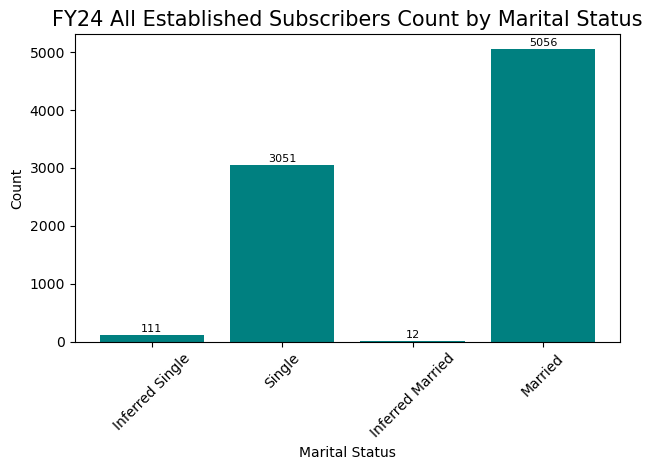

In [34]:
marital_counts = df_establish.groupby('marital_status')['ticket_type'].count()

order = ['Inferred Single', 'Single', 'Inferred Married', 'Married']
marital_counts = marital_counts.reindex(order)

plt.bar(marital_counts.index, marital_counts.values, color='teal')
plt.title('FY24 All Established Subscribers Count by Marital Status', fontsize = 15)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, value in enumerate(marital_counts.values):
    plt.text(i, value + 50, str(value), ha='center', va='baseline', fontsize=8)
plt.tight_layout()
plt.show()

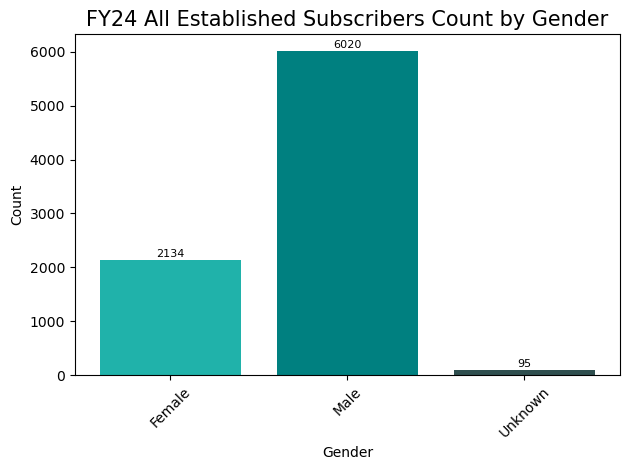

In [35]:
gender_counts = df_establish.groupby('gender')['ticket_type'].count()

plt.bar(gender_counts.index, gender_counts.values, color=['lightseagreen', 'teal', 'darkslategray'])
plt.title('FY24 All Established Subscribers Count by Gender', fontsize = 15)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, value in enumerate(gender_counts.values):
    plt.text(i, value + 50, str(value), ha='center', va='baseline', fontsize=8)
plt.tight_layout()
plt.show()